### Preamble: Widgets, Display, Visualisation

Misc. widgets & configuration

In [113]:
from IPython.display import display
from ipywidgets import interact, fixed, HBox

In [72]:
%matplotlib inline
from matplotlib.pyplot import *
rcParams['figure.figsize'] = (15,8)
rcParams['font.size'] = 18

----

Python Imaging Library
=====================

Notebook based on the [tutorial] of the [Python Imaging Library Handbook]

[tutorial]: http://effbot.org/imagingbook/introduction.htm
[Python Imaging Library Handbook]: http://effbot.org/imagingbook/pil-index.htm


In [73]:
from PIL import Image

The test image `lena.ppm` is required. 
If it is not already in the `images` directory, download it and put it there.
It is available in the collection of [Public-Domain Test Images].

[Public-Domain Test Images]: https://homepages.cae.wisc.edu/~ece533/images/ 

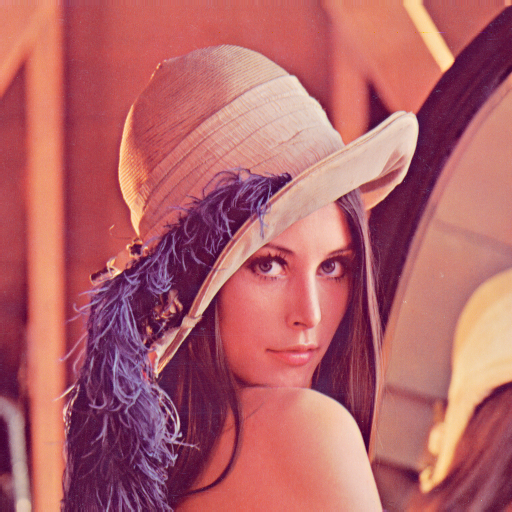

In [74]:
im = Image.open("images/lena.ppm")
im

In [75]:
512-128


384

In [76]:
print(im.format, im.size, im.mode)

PPM (512, 512) RGB


In [77]:
left = 128
upper = 128
right = 512 - 128
lower = 512 - 128

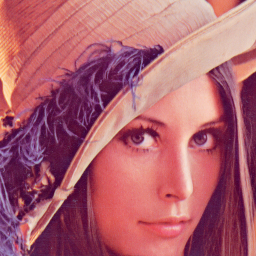

In [78]:
im.crop((left, upper, right, lower))

In [79]:
@interact(left=fixed(0), upper=fixed(0), right=256, lower=256)
def crop(left, upper, right, lower):
    return im.crop((left, upper, right, lower))


interactive(children=(IntSlider(value=256, description='right', max=768, min=-256), IntSlider(value=256, description='lower', max=768, min=-256), Output()), _dom_classes=('widget-interact',))

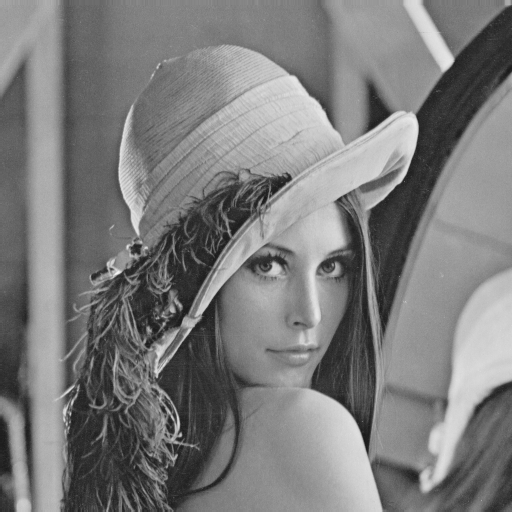

In [80]:
im.convert("L")

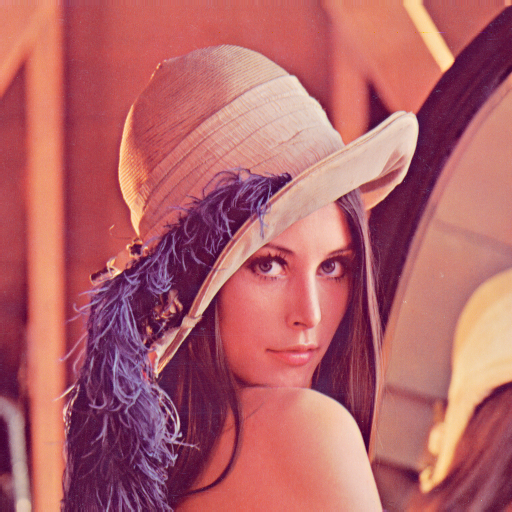

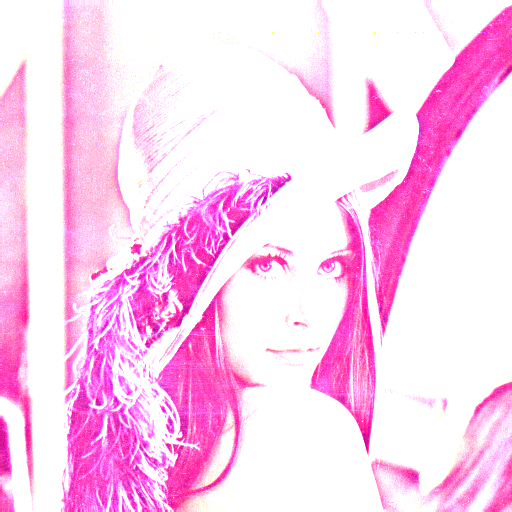

In [81]:
def f(factor):
    return im.point(lambda i: i * factor)

#interact(f, factor=IntSlider(min=0.0,max=2.0,step=0.1,value=1.0))

display(f(1.0))
f(3.0)

In [111]:
@interact(factor=1.0)
def f(factor):
    return im.point(lambda i: i * factor)

interactive(children=(FloatSlider(value=1.0, description='factor', max=3.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

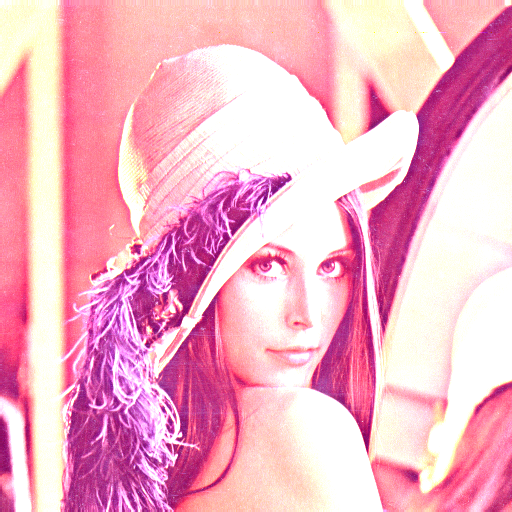

In [112]:
f(2.0)

Color Channels
----------------

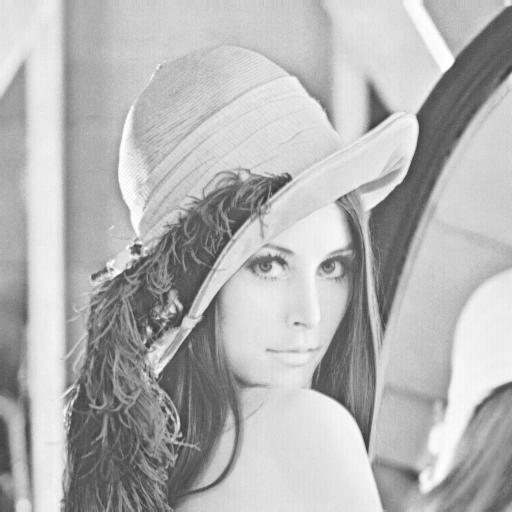

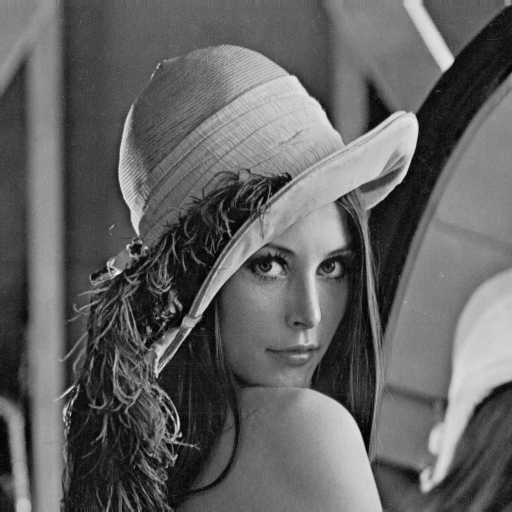

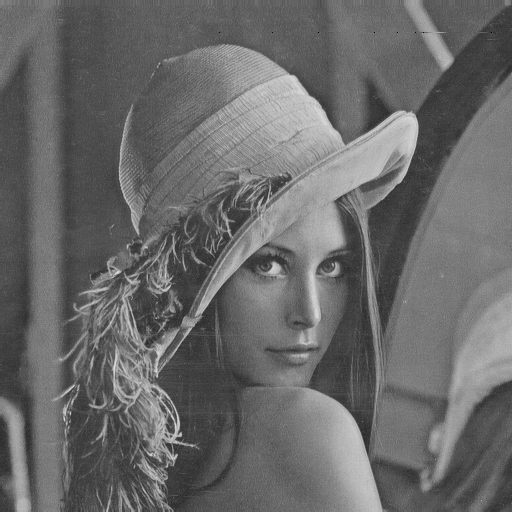

In [118]:
R, G, B = im.split()
display(R)
display(G)
display(B)

In [105]:
def histogram(im):
    R, G, B = im.split()
    Rh = R.histogram()
    Gh = G.histogram()
    Bh = B.histogram()
    plot(Rh, "r")
    plot(Gh, "g")
    plot(Bh, "b")
    w = im.size[0]
    h = im.size[1]
    ylabel("Pixel count (/{0})".format(w*h))
    xlabel("Intensity [0-255]")
    title("Color Histogram")
    #axis("tight")
    grid(True)
    autoscale(axis="x", tight=True)


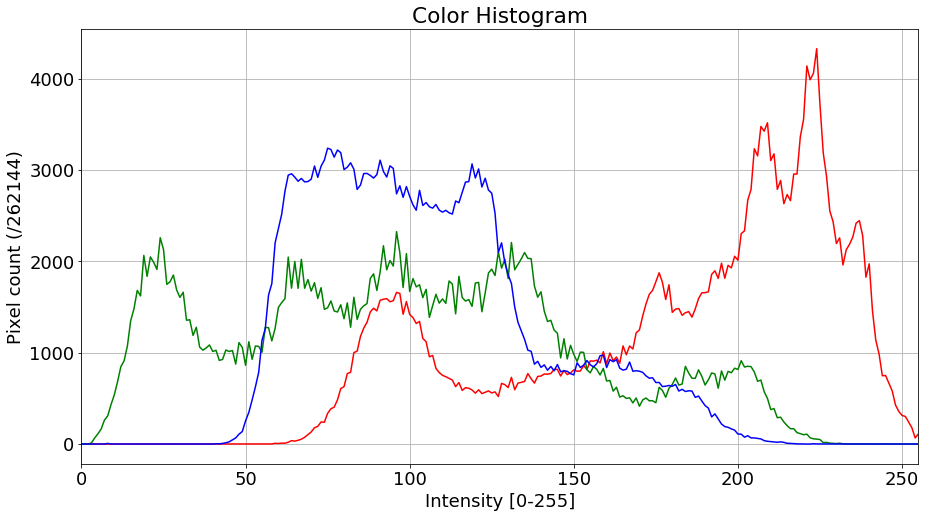

In [106]:
histogram(im)

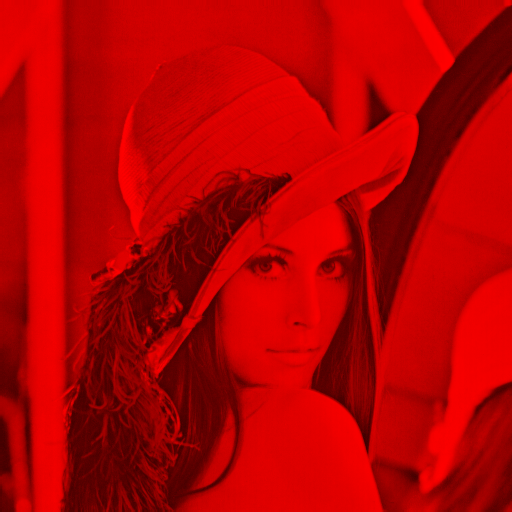

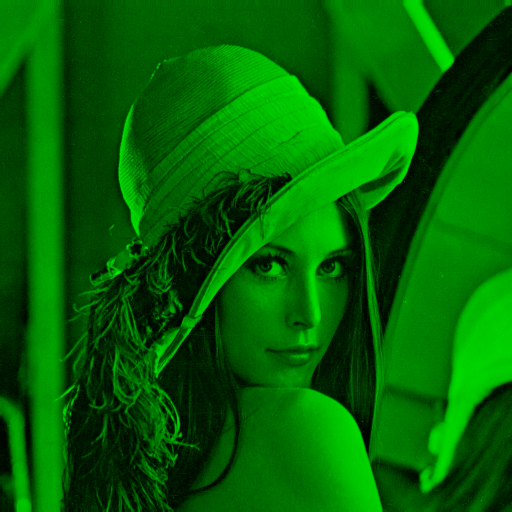

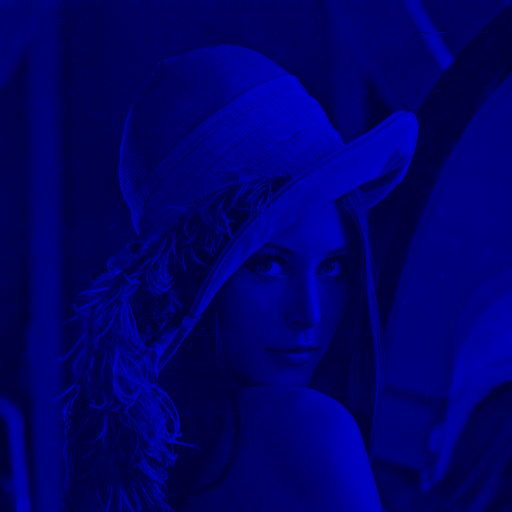

In [86]:
Z = R.point(lambda i: 0)
display(Image.merge("RGB", (R, Z, Z)))
display(Image.merge("RGB", (Z, G, Z)))
display(Image.merge("RGB", (Z, Z, B)))

